# Histogram Specification

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_histogram(image, bins):
    histogram = np.zeros(bins)
    total = image.sum()
    
    for pixel in image:
        histogram[pixel] += 1
    
    return histogram

In [4]:
def cumsum(a):
    b = np.zeros(a.shape[0])
    b[0] = a[0]
    for i in range(1,a.shape[0]):
        b[i] = b[i-1] + a[i]
    return b

In [5]:
def histogram_equalization_cs(img):
    flat = img.flatten()
    
    hist = get_histogram(flat, 256)
    hist = hist/hist.sum()
    
    cs = cumsum(hist)
    cs *= 255 #(n-1)
    
    cs_int = np.zeros(cs.shape[0], dtype = 'int')
    for i in range(cs.shape[0]):
        cs_int[i] = round(cs[i])
    
    return cs_int

In [6]:
def histogram_specification(img1, img2):
    cs_img1 = histogram_equalization_cs(img1)
    cs_img2 = histogram_equalization_cs(img2)
    
    arr = np.zeros(dtype='int',shape = (256,))
    spc_img = np.zeros(dtype='int',shape = img1.shape)
    for i in range(256):
        search=cs_img1[i]
        for j in range(256):
            if cs_img2[j] >= search:
                arr[i] = j
                break
    
    spc_img = arr[img1]
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    fig.add_subplot(1,3,1)
    plt.imshow(img1)

    fig.add_subplot(1,3,2)
    plt.imshow(img2)

    fig.add_subplot(1,3,3)
    plt.imshow(spc_img)

In [9]:
img1 = cv2.imread("IA4.jpg")
img2 = cv2.imread("IA2.jpg")

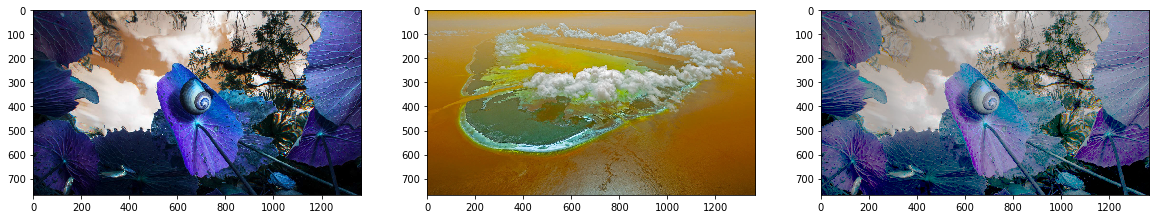

In [10]:
histogram_specification(img1, img2)